In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

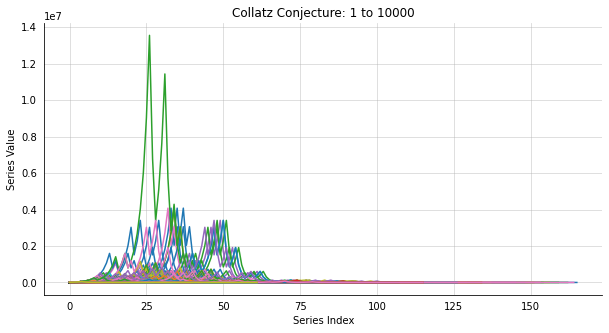

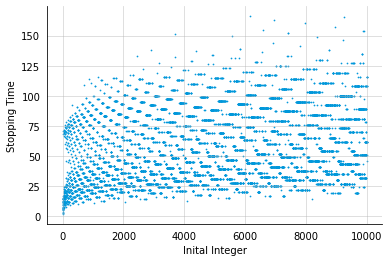

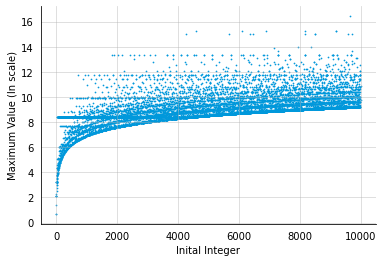

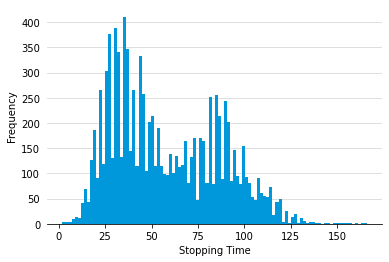

In [218]:
# Collatz Conjecture
# https://mathworld.wolfram.com/CollatzProblem.html

def collatz_fn(x):
    if x%2 == 0:
        return x/2
    elif x%2 == 1:
        return (3*x + 1)/2
    else:
        print("Error")
        
def collatz_series(n):
    y = [n]
    cont = True
    while cont:
        nextY = collatz_fn(y[-1])
        y.append(nextY)
        if nextY == 1:
            cont = False
    return y

def collatz_monte(start=1, end=10000, returnData=False, graphs=["series", "scatterStop", "scatterMax", "hist"]):
    Y = []
    for i in range(start, end):
        Y.append(collatz_series(i))
        
    if "series" in graphs:
        # Series Value vs. Index
        fig, ax = plt.subplots(figsize=(10,5))
        ax.set_title(f"Collatz Conjecture: {start} to {end}")
        ax.set_ylabel("Series Value")
        ax.set_xlabel("Series Index")
        for i in range(len(Y)):
            ax.plot(np.arange(0, len(Y[i])), Y[i], zorder=10)

        ax.spines[["top", "right"]].set_visible(False)
        ax.xaxis.set_tick_params(bottom=False)
        ax.yaxis.set_tick_params(left=False)
        ax.grid(True, alpha=0.5, zorder=0)
        
    if ("scatterStop" in graphs) or ("scatterMax" in graphs) or ("hist" in graphs):
    
        n = []
        i = []
        m = []
        for idx in range(len(Y)):
            n.append(Y[idx][0])
            i.append(len(Y[idx]))
            m.append(max(Y[idx]))
            
    if "scatterStop" in graphs:
        # Scatter: Stopping Time vs. Initial Integer
        fig, ax = plt.subplots()
        ax.scatter(n, i, s=0.5, color="#0098db")
        ax.spines[["top", "right"]].set_visible(False)
        ax.xaxis.set_tick_params(bottom=False)
        ax.yaxis.set_tick_params(left=False)
        ax.grid(True, alpha=0.5, zorder=0)
        ax.set_xlabel("Inital Integer")
        ax.set_ylabel("Stopping Time")
    
    if "scatterMax" in graphs:
        # Scatter: Maximum Value vs. Initial Integer
        fig, ax = plt.subplots()
        ax.scatter(n, np.log(np.asarray(m)), s=0.5, color="#0098db")
        ax.spines[["top", "right"]].set_visible(False)
        ax.xaxis.set_tick_params(bottom=False)
        ax.yaxis.set_tick_params(left=False)
        ax.grid(True, alpha=0.5, zorder=0)
        ax.set_xlabel("Inital Integer")
        ax.set_ylabel("Maximum Value (ln scale)")
    
    if "hist" in graphs:
    
        # Histogram
        fig, ax = plt.subplots()
        ax.hist(i, bins=100, color="#0098db", zorder=10)
        ax.spines[["top", "right", "left"]].set_visible(False)
        ax.yaxis.grid(True, 'major', alpha=0.5, zorder=0)
        ax.yaxis.set_tick_params(left=False)
        ax.set_xlabel("Stopping Time")
        ax.set_ylabel("Frequency")
    
    plt.show()
    
    if returnData:
        return Y
        
collatz_monte(returnData=False)

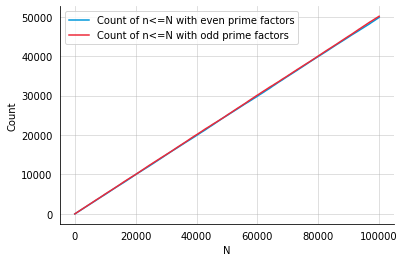

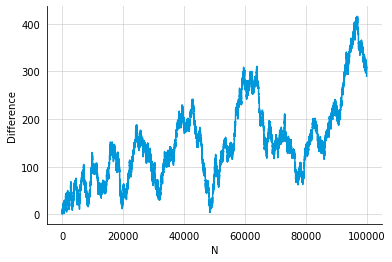

In [217]:
# Polya Conjecture
# https://mathworld.wolfram.com/PolyaConjecture.html
# This is only a visualisation of the conjecture: finding a number that disproves takes a very long time and has been done
# already at https://stackoverflow.com/questions/24586626/a-counter-example-for-polyas-conjecture

import primefac

def primeFactors(x):
    facs = list(primefac.primefac(x))
    if len(facs)%2 == 0:
        return 0
    else:
        return 1
    
def polya_series(N=3):
    x = np.arange(1, N+1)
    evenPrimes = [0]
    oddPrimes = [1]
    
    for val in x[1:]:
        if primeFactors(int(val)) == 0:
            evenPrimes.append(evenPrimes[-1] + 1)
            oddPrimes.append(oddPrimes[-1])
        else:
            oddPrimes.append(oddPrimes[-1] + 1)
            evenPrimes.append(evenPrimes[-1])

    fig, ax = plt.subplots()
    ax.plot(x, evenPrimes, label="Count of n<=N with even prime factors", color="#0098db")
    ax.plot(x, oddPrimes, label="Count of n<=N with odd prime factors", color="#ed2939")
    ax.set_ylabel("Count")
    ax.set_xlabel("N")
    ax.legend()
    ax.spines[["top", "right"]].set_visible(False)
    ax.xaxis.set_tick_params(bottom=False)
    ax.yaxis.set_tick_params(left=False)
    ax.grid(True, alpha=0.5, zorder=0)
    plt.show()
    
    diff = np.asarray(oddPrimes) - np.asarray(evenPrimes)
    
    fig, ax = plt.subplots()
    ax.plot(x, diff, color="#0098db")
    ax.spines[["top", "right"]].set_visible(False)
    ax.xaxis.set_tick_params(bottom=False)
    ax.yaxis.set_tick_params(left=False)
    ax.grid(True, alpha=0.5, zorder=0)
    ax.set_ylabel("Difference")
    ax.set_xlabel("N")
    plt.show()

polya_series(100000)

In [ ]:
# Riemann hypothesis: unsolved
# z(s) = sum_(n=1)^inf (1 / (n)^s)
# Note the below animation will not work in Jupyter notebook... copy code into .py file and run from terminal

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

real = 1/2
domStart=0
domEnd=100

def zeta(i,r=real,E=1e-24):
 R=0;I=0;n=0;
 while(True):
  a=0;b=0;m=2**(-n-1)
  for k in range(0,n+1):
   M=(-1)**k*np.product([x/(x-(n-k))for x in range(n-k+1,n+1)]);A=(k+1)**-r;t=-i*np.log(k+1);a+=M*A*np.cos(t);b+=M*A*np.sin(t)
  a*=m;b*=m;R+=a;I+=b;n+=1
  if a*a+b*b<E:break
 A=2**(1-r);t=-i*np.log(2);a=1-A*np.cos(t);b=-A*np.sin(t);d=a*a+b*b;a=a/d;b=-b/d
 return R*a-I*b, R*b+I*a

inputT = np.arange(domStart,domEnd, 0.1)
g = np.vectorize(zeta)
vect = g(inputT)

fig, ax = plt.subplots()
ax.set_title(f"Riemann Zeta Function: s = {real} + t*i, for t in [{domStart}, {domEnd})")
ax.plot([0,0], [-3,3], color="black", zorder=20)
ax.plot([-2,6], [0,0], color="black", zorder=20)
ax.set_xlim(-2, 6)
ax.set_ylim(-3, 3)
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.grid(True, 'both', alpha=0.5, zorder=0)
ax.xaxis.set_tick_params(bottom=False)
ax.yaxis.set_tick_params(left=False)
ax.set_xlabel("Re(z)")
ax.set_ylabel("Im(z)")

line, = ax.plot([], [], color="#0098db", zorder=10)

def animate(i):
  line.set_xdata(vect[0][:i])
  line.set_ydata(vect[1][:i])

anim = animation.FuncAnimation(fig, animate, interval=0.1, frames = len(inputT) -1)
anim.save("riemannZeta.gif")

plt.show()